# Loan Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

<h4> 1. Preparing dataset for preprocessing </h4>

In [2]:
data = pd.read_csv('data/loan.csv', low_memory=False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data.shape

(887379, 74)

In [4]:
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0     10.65       162.87     B        B2                       NaN  10+ years   
1     15.27        59.83     C        C4                     Ryder   < 1 year   
2     15.96        84.33     C        C5                       NaN  10+ years   
3     13.49       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4     12.69        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status   issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-2011   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-2011  Charged Off   
2           RENT     12252.0        Not Verified  Dec-2011   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-2011   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-2011      Current   

  pymnt_plan                                                url  \
0          n  https://www.lendingclub.com/browse/loanDetail....   
1          n  https://www.lendingclub.com/browse/loanDetail....   
2          n  https://www.lendingclub.com/browse/loanDetail....   
3          n  https://www.lendingclub.com/browse/loanDetail....   
4          n  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0         Jan-1985             1.0                     NaN   
1         Apr-1999             5.0                     NaN   
2         Nov-2001             2.0                     NaN   
3         Feb-1996             1.0                    35.0   
4         Jan-1996             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0    13648.0        83.7   
1                     NaN       3.0      0.0     1687.0         9.4   
2                     NaN       2.0      0.0     2956.0        98.5   
3                     NaN      10.0      0.0     5598.0        21.0   
4                     NaN      15.0      0.0    27783.0        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302212   
4       38.0                   f      766.9          766.9   3242.170000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          500

In [5]:
pd.value_counts(data.loan_status).to_frame()

loan_status
Current                                                  601779
Fully Paid                                               207723
Charged Off                                               45248
Late (31-120 days)                                        11591
Issued                                                     8460
In Grace Period                                            6253
Late (16-30 days)                                          2357
Does not meet the credit policy. Status:Fully Paid         1988
Default                                                    1219
Does not meet the credit policy. Status:Charged...          761

In [6]:
data = data[data.loan_status != 'Fully Paid']
data = data[data.loan_status != 'Does not meet the credit policy. Status:Fully Paid']
data = data[data.loan_status != 'Issued']

data['rating'] = np.where((data.loan_status != 'Current'), 1,0) # 1 (bad loan) 0 (good loan)
pd.value_counts(data.rating).to_frame()

rating
0  601779
1   67429

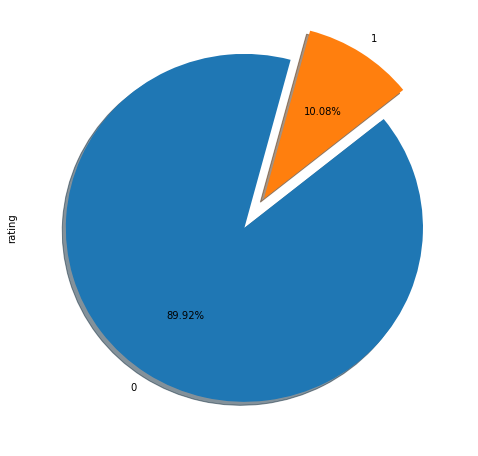

In [7]:
# 1 (bad loan) 0 (good loan)
plt.figure(figsize=(8,8))
pd.value_counts(data.rating).plot.pie(explode = [0, 0.2], autopct='%1.2f%%', shadow = True, startangle = 75)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669208 entries, 1 to 887378
Data columns (total 75 columns):
id                             669208 non-null int64
member_id                      669208 non-null int64
loan_amnt                      669208 non-null float64
funded_amnt                    669208 non-null float64
funded_amnt_inv                669208 non-null float64
term                           669208 non-null object
int_rate                       669208 non-null float64
installment                    669208 non-null float64
grade                          669208 non-null object
sub_grade                      669208 non-null object
emp_title                      628983 non-null object
emp_length                     632405 non-null object
home_ownership                 669208 non-null object
annual_inc                     669208 non-null float64
verification_status            669208 non-null object
issue_d                        669208 non-null object
loan_status          

<h4> 2. Reviewing variables - drop and edit </h4>

Review each non-numerical variable to either edit or drop it

<h4><b> Term </b></h4>

In [9]:
pd.value_counts(data.term).to_frame()

term
 36 months  445779
 60 months  223429

In [10]:
# Change term variable to numerical variable
term={' 36 months':36, ' 60 months':60}
data.term.replace(term, inplace=True)

<h4><b> Grade and Sub-Grade</b></h4>
Following two variables are dedicated to credit rating of each individual. Will change them to numerical while making sure that the hierarchy is taken into account. Lowest number will mean best grade/subgrade.

In [11]:
pd.value_counts(data.grade).to_frame()

grade
C  190229
B  185191
D  107843
A  106985
E   56806
F   17972
G    4182

In [12]:
grade = data.grade.unique()
grade.sort()
grade

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [13]:
for x, e in enumerate(grade):
    data.grade.replace(to_replace=e, value=x, inplace=True)
data.grade.unique()

array([2, 1, 5, 3, 0, 4, 6])

In [14]:
pd.value_counts(data.sub_grade).to_frame()

sub_grade
B4      40432
C1      40223
B3      39907
C2      39809
C3      39358
C4      38769
B5      36033
B2      35209
B1      33610
A5      33363
C5      32070
D1      28149
A4      23941
D2      22670
D3      20279
D4      19940
A1      16899
D5      16805
A3      16464
A2      16318
E1      14706
E2      13709
E3      11386
E4       9393
E5       7612
F1       5655
F2       4186
F3       3441
F4       2672
F5       2018
G1       1436
G2       1068
G3        767
G4        479
G5        432

In [15]:
sub_grade = data.sub_grade.unique()
sub_grade.sort()
sub_grade

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [16]:
for x, e in enumerate(sub_grade):
    data.sub_grade.replace(to_replace=e, value=x, inplace=True)
data.sub_grade.unique()

array([13,  9, 14, 26, 10,  6,  8,  7, 11, 16,  4,  5, 23, 17, 28, 18, 19,
        1, 12,  2, 25, 15,  3, 24, 20, 21, 22, 32, 31, 30, 27, 29,  0, 33,
       34])

<h4><b> Employee Title and Length </b></h4>
Following two variables describe title and length of employment. Title has 212 thousand categories so it will be dropped. Lenghth of employment should be sufficient to show whether an individual has a stable job.

In [17]:
pd.value_counts(data.emp_title).to_frame() # more than 200 thousand employee categories, hence will be DROPPED

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [18]:
pd.value_counts(data.emp_length).to_frame()

emp_length
10+ years      224690
2 years         58373
< 1 year        52437
3 years         52304
1 year          42398
5 years         40216
4 years         38469
8 years         33757
7 years         32778
6 years         30470
9 years         26513

In [19]:
emp_len = {'n/a' : 0, 
           '< 1 year' : 1, 
           '1 year' : 2,
           '2 years' : 3, 
           '3 years' : 4,
           '4 years' : 5,
           '5 years' : 6,
           '6 years' : 7,
           '7 years' : 8,
           '8 years' : 9,
           '9 years' : 10,
           '10+ years' : 11}
data.emp_length.replace(emp_len, inplace=True)
data.emp_length = data.emp_length.replace(np.nan, 0)
data.emp_length.unique()

array([ 1.,  2.,  9.,  5.,  4., 11., 10.,  3.,  8.,  7.,  6.,  0.])

<h4><b> Home ownership </b></h4>
Home ownership variable should be informative for model as individuals who own their home should be much safer clients that ones that only rent it.

In [20]:
pd.value_counts(data.home_ownership).to_frame()

home_ownership
MORTGAGE          333463
RENT              267358
OWN                68334
OTHER                 41
NONE                  10
ANY                    2

<h4><b> Verification Status </b></h4>
Verification status variable indicated whether the source of income of a client was verified.

In [21]:
pd.value_counts(data.verification_status).to_frame()

verification_status
Source Verified               266243
Verified                      214171
Not Verified                  188794

<h4><b> Issued Date </b></h4>
Can be transformed to date time

In [22]:
data.issue_d = pd.to_datetime(data.issue_d)

<h4><b> Payment Plan </b></h4>
Payment plan variable will be dropped as it has only 3 'y' values

In [23]:
pd.value_counts(data.pymnt_plan).to_frame()

pymnt_plan
n      669200
y           8

<h4><b> Title and Purpose </b></h4>
There are two columns that describe a reason for the loan - title and purpose. As shown below title has many more categories which makes it less specific and helpful for the model, so it will be dropped.

In [24]:
pd.value_counts(data.title).to_frame()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [25]:
pd.value_counts(data.purpose).to_frame()

purpose
debt_consolidation   397847
credit_card          161590
home_improvement      38533
other                 30770
major_purchase        11602
small_business         6801
medical                6128
car                    5533
moving                 3728
vacation               3348
house                  2271
wedding                 614
renewable_energy        354
educational              89

<h4><b> Zip Code </b></h4>
Zip code information is to specific, there are 930 individual values, and there is no sense to make it more general as cutting it to two digits as this will only describe state, which is done by the next variable. Zip code will be dropped.

In [26]:
pd.value_counts(data.zip_code).to_frame()

zip_code
750xx      6984
945xx      6889
112xx      6867
606xx      6429
300xx      6092
331xx      5549
070xx      5546
100xx      5350
770xx      5170
900xx      5149
891xx      4884
330xx      4746
117xx      4734
104xx      4641
917xx      4604
852xx      4034
921xx      3992
926xx      3813
913xx      3721
601xx      3603
481xx      3595
334xx      3574
113xx      3544
925xx      3537
604xx      3534
600xx      3528
080xx      3506
021xx      3201
301xx      3139
760xx      3135
920xx      3110
853xx      3097
773xx      3076
980xx      3067
956xx      3064
207xx      3050
802xx      3002
774xx      2995
928xx      2994
201xx      2877
941xx      2872
480xx      2870
850xx      2866
782xx      2784
212xx      2773
088xx      2743
951xx      2684
114xx      2650
902xx      2649
553xx      2645
275xx      2631
923xx      2602
554xx      2579
333xx      2546
605xx      2530
752xx      2473
800xx      2466
327xx      2441
775xx      2417
786xx      2391
441xx      2386
303xx      2374
953xx      2359
328xx      2334
191xx      2325
787xx      2314
940xx      2303
483xx      2296
967xx      2268
064xx      2266
190xx      2262
302xx      2256
840xx      2239
890xx      2233
958xx      2209
761xx      2189
282xx      2135
430xx      2122
210xx      2004
335xx      1984
801xx      1981
322xx      1978
060xx      1970
981xx      1958
028xx      1956
370xx      1928
950xx      1903
972xx      1892
982xx      1887
115xx      1875
337xx      1857
751xx      1842
551xx      1841
105xx      1828
906xx      1806
462xx      1800
440xx      1799
970xx      1770
857xx      1762
208xx      1751
347xx      1726
922xx      1723
907xx      1715
432xx      1708
336xx      1707
919xx      1686
296xx      1662
152xx      1656
076xx      1656
200xx      1647
930xx      1644
983xx      1644
018xx      1639
077xx      1637
103xx      1618
346xx      1612
799xx      1590
550xx      1590
452xx      1575
339xx      1574
342xx      1571
109xx      1570
283xx      1553
631xx      1547
871xx      1493
785xx      1490
640xx      1486
280xx      1483
294xx      1479
463xx      1468
142xx      1447
762xx      1445
211xx      1444
217xx      1419
325xx      1415
329xx      1410
338xx      1398
630xx      1381
305xx      1367
531xx      1340
221xx      1331
234xx      1326
402xx      1323
180xx      1313
450xx      1302
908xx      1301
986xx      1298
074xx      1297
660xx      1290
442xx      1287
805xx      1285
532xx      1284
276xx      1276
740xx      1273
809xx      1258
730xx      1256
371xx      1254
641xx      1254
935xx      1252
320xx      1214
461xx      1207
220xx      1206
482xx      1203
381xx      1198
700xx      1197
068xx      1195
973xx      1189
019xx      1185
194xx      1183
460xx      1181
946xx      1178
206xx      1175
023xx      1168
932xx      1167
765xx      1166
125xx      1162
410xx      1156
281xx      1153
530xx      1149
027xx      1142
933xx      1138
633xx      1138
957xx      1135
223xx      1128
078xx      1125
140xx      1123
130xx      1116
705xx      1114
087xx      1104
146xx      1103
010xx      1098
232xx      1096
488xx      1086
431xx      1082
349xx      1078
662xx      1070
731xx      1064
272xx      1052
170xx      1048
111xx      1045
968xx      1038
015xx      1037
067xx      1031
954xx      1029
030xx      1027
841xx      1027
490xx      1014
974xx      1000
851xx       999
029xx       995
295xx       991
150xx       985
321xx       981
286xx       979
120xx       978
934xx       972
949xx       969
959xx       967
310xx       962
380xx       958
952xx       947
352xx       941
727xx       941
985xx       938
231xx       920
350xx       920
937xx       916
535xx       898
020xx       897
936xx       892
065xx       892
107xx       891
622xx       890
927xx       877
704xx       875
894xx       868
073xx       867
151xx       858
193xx       853
284xx       852
984xx       845
071xx       843
290xx       834
372xx       830
797xx       827
707xx       824
145xx       823
701xx       819
209xx       815
453xx  

<h4><b> State Address </b></h4>

In [27]:
pd.value_counts(data.addr_state).to_frame()

addr_state
CA       92369
NY       55959
TX       54013
FL       46147
IL       27356
NJ       25093
PA       24210
OH       23008
GA       22054
VA       19430
NC       18806
MI       17862
MD       15862
MA       15190
AZ       15158
WA       14287
CO       13760
MN       12127
IN       11490
TN       10867
MO       10857
CT       10275
NV        9309
WI        8886
AL        8569
SC        8147
LA        8071
OR        7977
KY        6620
OK        6285
KS        6096
AR        5144
UT        4442
NM        3774
MS        3429
WV        3368
HI        3321
NH        3250
RI        2953
DE        1919
MT        1891
DC        1661
AK        1620
WY        1488
VT        1422
SD        1341
NE        1110
ME         479
ND         448
IA           4
ID           4

<h4><b> Earliest Credit Line </b></h4>

In [28]:
earliest_cr_line = pd.to_datetime(data.earliest_cr_line)
data.earliest_cr_line = earliest_cr_line.dt.year

<h4><b> Initial List Status </b></h4>
Next variable is initial listing status of the loan. Possible values are – W, F and will be changed to binary

In [29]:
pd.value_counts(data.initial_list_status).to_frame()

initial_list_status
w               364314
f               304894

In [30]:
int_status = {'w':0, 'f':1}
data.initial_list_status.replace(int_status, inplace=True)

<h4><b> Last Payment Date, Next Payment Date and Last Credit Pull Date </b></h4>

In [31]:
data.last_pymnt_d = pd.to_datetime(data.last_pymnt_d)
data.next_pymnt_d = pd.to_datetime(data.next_pymnt_d)
data.last_credit_pull_d = pd.to_datetime(data.last_credit_pull_d)

<h4><b> Policy Code </b></h4>
Policy code has only 1 value so will be dropped.

In [32]:
pd.value_counts(data.policy_code).to_frame()

policy_code
1.0       669208

<h4><b> Application Type </b></h4>
Application type variable shows whether the loan is individual or joint - number of joint loans will reflect huge number of NaN values in other variables dedicated for these loans. Will change this variable to binary.

In [33]:
pd.value_counts(data.application_type).to_frame()

application_type
INDIVIDUAL            668762
JOINT                    446

In [34]:
app_type={'INDIVIDUAL':0, 'JOINT':1}
data.application_type.replace(app_type, inplace=True)

<h4><b> Recoveries </b></h4>
Recoveries variable informs about post charge off gross recovery. Will transform this to binary that will show whether this loan was recoveried. Will drop recovery fee as it is doubling similar information.

In [35]:
pd.value_counts(data.recoveries).to_frame()

recoveries
0.000000          644531
200.000000            10
11.700000              9
14.280000              9
10.000000              9
16.500000              8
10.400000              8
800.000000             8
16.800000              8
100.000000             8
11.200000              7
10.080000              7
12.000000              7
1200.000000            7
10.200000              7
19.200000              6
10.920000              6
10.560000              6
3000.000000            6
2500.000000            6
13.200000              6
11.160000              6
5000.000000            6
13.440000              6
10.350000              6
12.240000              6
5200.000000            6
10.660000              6
13.500000              6
11.680000              5
21.600000              5
10.710000              5
12.800000              5
2000.000000            5
13.600000              5
11.900000              5
10.500000              5
4800.000000            5
12.420000              5
15.120000              5
10.300000              5
16.000000              5
18.600000              5
24.000000              5
12.100000              5
20.160000              5
10.700000              4
10.720000              4
2350.000000            4
11.520000              4
13.110000              4
10.100000              4
900.000000             4
13.000000              4
11.800000              4
13.640000              4
12.600000              4
21.840000              4
18.000000              4
16.120000              4
10.140000              4
13.590000              4
13.090000              4
14.960000              4
11.760000              4
12.480000              4
11.600000              4
15.580000              4
14.630000              4
13.930000              4
13.400000              4
17.100000              4
3500.000000            4
11.290000              4
15.150000              4
1000.000000            4
12.880000              4
12.040000              4
24.140000              4
14.420000              4
12.090000              4
16.280000              4
10.440000              4
10.800000              4
11.340000              4
1645.840000            3
11.360000              3
18.260000              3
10.620000              3
14.800000              3
428.750000             3
19.790000              3
10.670000              3
400.000000             3
17.700000              3
15.000000              3
1138.760000            3
516.650000             3
14.490000              3
12.320000              3
14.580000              3
6000.000000            3
17.800000              3
10.600000              3
20.400000              3
14.640000              3
12.740000              3
13.800000              3
14.410000              3
17.600000              3
10.180000              3
10.070000              3
667.050000             3
14.940000              3
11.120000              3
12.870000              3
415.520000             3
1199.430000            3
9.770000               3
10.890000              3
13.560000              3
12.430000              3
12.780000              3
182.400000             3
15.260000              3
16.270000              3
11.400000              3
15.480000              3
16.590000              3
14.450000              3
17.160000              3
30.240000              3
926.900000             3
268.190000             3
12.960000              3
709.960000             3
16.080000              3
16.240000              3
10.830000              3
836.070000             3
15.610000              3
11.110000              3
14.200000              3
1040.050000            3
2838.700000            3
14.610000              3
2400.000000            3
1500.000000            3
19.620000              3
19.320000              3
300.000000             3
16.200000              3
11.550000              3
11.040000              3
10.260000              3
16.320000              3
9.680000               3
491.770000             3
3852.710000            3
15.250000     

In [36]:
data['recovery'] = np.where((data.recoveries != 0.00), 1, 0)

In [37]:
pd.value_counts(data.collection_recovery_fee).to_frame()

collection_recovery_fee
0.0000                      645701
2.0000                          18
1.8000                          13
1.5500                          12
1.2000                          12
1.8800                          12
4.5200                          11
1.6000                          11
1.0700                          11
1.9000                          11
2.5200                          11
3.2000                          11
0.8000                          11
3.3900                          11
1.4400                          10
2.7300                          10
2.6100                          10
2.8800                          10
1.6900                          10
1.6200                          10
0.9300                          10
2.0200                          10
3.0900                          10
3.9300                          10
4.4100                           9
2.0800                           9
4.0000                           9
2.5400                           9
1.2900                           9
0.4800                           9
1.5600                           9
1.8400                           9
4.6700                           9
4.0200                           9
2.0400                           9
1.3100                           9
1.4500                           9
3.2300                           9
0.8100                           9
3.7100                           9
3.0100                           9
2.4300                           9
0.4400                           9
1.3900                           9
3.3500                           9
1.2100                           9
3.9600                           9
1.1600                           9
0.6300                           8
2.3000                           8
2.5600                           8
2.2800                           8
2.6800                           8
18.0000                          8
3.6400                           8
4.8700                           8
2.8700                           8
4.8000                           8
3.6100                           8
2.5700                           8
3.8800                           8
4.1600                           8
4.7800                           8
1.9100                           8
1.3700                           8
1.0200                           8
2.0100                           8
1.3000                           8
1.7600                           8
0.6000                           8
0.7900                           8
4.9500                           8
5.6000                           8
2.2200                           8
4.7300                           8
1.9200                           8
2.4600                           8
3.8400                           8
2.0500                           8
1.1700                           8
1.4700                           7
4.8100                           7
2.8100                           7
2.1500                           7
1.2300                           7
4.0600                           7
7.2700                           7
4.3200                           7
2.7900                           7
1.5800                           7
5.1900                           7
1.2200                           7
3.4300                           7
3.0000                           7
3.5500                           7
4.0100                           7
2.5800                           7
1.7300                           7
6.0200                           7
3.5400                           7
1.4800                           7
5.0000                           7
2.4700                           7
4.6100                           7
4.5000                           7
0.9400                           7
3.5100                           7
4.8900                           7
7.2000                           7
0.8300                           7
2.4800                           7
5.2400                           7
2.6200                           7
1.6500               

<h4><b> Dropping All Variable Mentioned Above </b></h4>

In [38]:
data.drop(['id', 'member_id', 'emp_title', 'pymnt_plan', 'url', 'desc', 'title', 'zip_code', 'policy_code',
           'collection_recovery_fee', 'loan_status', 'recoveries'], axis=1, inplace=True)

In [39]:
data.head(10)

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
1      2500.0       2500.0           2500.0    60     15.27        59.83   
4      3000.0       3000.0           3000.0    60     12.69        67.79   
6      7000.0       7000.0           7000.0    60     15.96       170.08   
8      5600.0       5600.0           5600.0    60     21.28       152.39   
9      5375.0       5375.0           5350.0    60     12.69       121.45   
12     9000.0       9000.0           9000.0    36     13.49       305.38   
14    10000.0      10000.0          10000.0    36     10.65       325.74   
21    21000.0      21000.0          21000.0    36     12.42       701.73   
24     6000.0       6000.0           6000.0    36     11.71       198.46   
26    15000.0      15000.0           8725.0    36     14.27       514.64   

    grade  sub_grade  emp_length home_ownership  annual_inc  \
1       2         13         1.0           RENT     30000.0   
4       1          9         2.0           RENT     80000.0   
6       2         14         9.0           RENT     47004.0   
8       5         26         5.0            OWN     40000.0   
9       1          9         1.0           RENT     15000.0   
12      2         10         1.0           RENT     30000.0   
14      1          6         4.0           RENT    100000.0   
21      1          8        11.0           RENT    105000.0   
24      1          7         2.0           RENT     76000.0   
26      2         11        10.0           RENT     60000.0   

   verification_status    issue_d             purpose addr_state    dti  \
1      Source Verified 2011-12-01                 car         GA   1.00   
4      Source Verified 2011-12-01               other         OR  17.94   
6         Not Verified 2011-12-01  debt_consolidation         NC  23.51   
8      Source Verified 2011-12-01      small_business         CA   5.55   
9             Verified 2011-12-01               other         TX  18.08   
12     Source Verified 2011-12-01  debt_consolidation         VA  10.08   
14     Source Verified 2011-12-01               other         CA   7.06   
21            Verified 2011-12-01  debt_consolidation         FL  13.22   
24        Not Verified 2011-12-01      major_purchase         CA   2.40   
26        Not Verified 2011-12-01  debt_consolidation         NY  15.22   

    delinq_2yrs  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
1           0.0            1999.0             5.0                     NaN   
4           0.0            1996.0             0.0                    38.0   
6           0.0            2005.0             1.0                     NaN   
8           0.0            2004.0             2.0                     NaN   
9           0.0            2004.0             0.0                     NaN   
12          0.0            2004.0             1.0                     NaN   
14          0.0            1991.0             2.0                     NaN   
21          0.0            1983.0             0.0                     NaN   
24          0.0            2001.0             1.0                     NaN   
26          0.0            2003.0             1.0                     NaN   

    mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
1                      NaN       3.0      0.0     1687.0         9.4   
4                      NaN      15.0      0.0    27783.0        53.9   
6                      NaN       7.0      0.0    17726.0        85.6   
8                      NaN      11.0      0.0     5210.0        32.6   
9                      NaN       2.0      0.0     9279.0        36.5   
12                     NaN       4.0      0.0    10452.0        91.7   
14                     NaN      14.0      0.0    11997.0        55.5   
21                     NaN       7.0      0.0    32135.0        90.3   
24                     NaN       7.0      0.0     5963.0        29.7   
26                     NaN       7.0      0.0     5872.0        57.6   

    to

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669208 entries, 1 to 887378
Data columns (total 64 columns):
loan_amnt                      669208 non-null float64
funded_amnt                    669208 non-null float64
funded_amnt_inv                669208 non-null float64
term                           669208 non-null int64
int_rate                       669208 non-null float64
installment                    669208 non-null float64
grade                          669208 non-null int64
sub_grade                      669208 non-null int64
emp_length                     669208 non-null float64
home_ownership                 669208 non-null object
annual_inc                     669208 non-null float64
verification_status            669208 non-null object
issue_d                        669208 non-null datetime64[ns]
purpose                        669208 non-null object
addr_state                     669208 non-null object
dti                            669208 non-null float64
delinq_2yrs 

<h4> 3. Missing Values </h4>

In [41]:
def meta(data):
    metadata = []
    for field in data.columns:
        null = data[field].isnull().sum()  # Counting null values
        dtype = data[field].dtype           # Defining the data types
        field_dict  = {
            'varname' : field,
            'nulls' : null,
            'dtype' : dtype
        }
        if field_dict['nulls'] > 0:
            metadata.append(field_dict)
    for m in metadata:
        if m['nulls'] > 0:
            print(m)
    meta = pd.DataFrame(metadata, columns=['varname','nulls','dtype'])
    meta.set_index('varname', inplace=True)
    meta = meta.sort_values(by=['nulls'], ascending=False)
    return meta
meta(data)

{'varname': 'delinq_2yrs', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'earliest_cr_line', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'inq_last_6mths', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'mths_since_last_delinq', 'nulls': 333634, 'dtype': dtype('float64')}
{'varname': 'mths_since_last_record', 'nulls': 560284, 'dtype': dtype('float64')}
{'varname': 'open_acc', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'pub_rec', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'revol_util', 'nulls': 313, 'dtype': dtype('float64')}
{'varname': 'total_acc', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'last_pymnt_d', 'nulls': 9247, 'dtype': dtype('<M8[ns]')}
{'varname': 'next_pymnt_d', 'nulls': 45248, 'dtype': dtype('<M8[ns]')}
{'varname': 'last_credit_pull_d', 'nulls': 36, 'dtype': dtype('<M8[ns]')}
{'varname': 'collections_12_mths_ex_med', 'nulls': 28, 'dtype': dtype('float64')}
{'varname': 'mths_since_last_major_derog', 'nulls': 488821, 'dtype': dtype('f

nulls           dtype
varname                                            
dti_joint                    668764         float64
annual_inc_joint             668762         float64
verification_status_joint    668762          object
il_util                      657650         float64
mths_since_rcnt_il           656332         float64
open_rv_24m                  655982         float64
total_bal_il                 655982         float64
open_il_24m                  655982         float64
open_il_12m                  655982         float64
open_il_6m                   655982         float64
open_acc_6m                  655982         float64
max_bal_bc                   655982         float64
inq_last_12m                 655982         float64
all_util                     655982         float64
inq_fi                       655982         float64
total_cu_tl                  655982         float64
open_rv_12m                  655982         float64
mths_since_last_record       560284         float64
mths_since_last_major_derog  488821         float64
mths_since_last_delinq       333634         float64
next_pymnt_d                  45248  datetime64[ns]
tot_coll_amt                  14599         float64
tot_cur_bal                   14599         float64
total_rev_hi_lim              14599         float64
last_pymnt_d                   9247  datetime64[ns]
revol_util                      313         float64
last_credit_pull_d               36  datetime64[ns]
collections_12_mths_ex_med       28         float64
delinq_2yrs                       3         float64
earliest_cr_line                  3         float64
total_acc                         3         float64
pub_rec                           3         float64
open_acc                          3         float64
inq_last_6mths                    3         float64
acc_now_delinq                    3         float64

<h4><b> Investigate variables associated with JOINT accounts for missing fields </b></h4>
There are only 446 JOINT loans accounts, and variables such as dti_joint, annual_inc_joint and verification_status_joint have many null values. Hence we will change NaN values will be changed to 0 and None for the verification_status_joint field.

In [42]:
data.dti_joint = data.dti_joint.replace(np.nan, 0)
data.annual_inc_joint = data.annual_inc_joint.replace(np.nan, 0)
data.verification_status_joint = data.verification_status_joint.replace(np.nan, 'None')

<h4><b> Investigate variables associated with open trade accounts opened in the last 6 months </b></h4>
Investigating variables associated with open_acc_6m which shows the number of open trades in the last 6 months. Variables open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, inq_fi, total_cu_tl, inq_last_12m and collections_12_mths_ex_med have null values for the same rows. Hence let's change them all to 0 as missing vaules show lack of open trades.

In [43]:
data.loc[(data.open_acc_6m).isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655982 entries, 1 to 887378
Data columns (total 64 columns):
loan_amnt                      655982 non-null float64
funded_amnt                    655982 non-null float64
funded_amnt_inv                655982 non-null float64
term                           655982 non-null int64
int_rate                       655982 non-null float64
installment                    655982 non-null float64
grade                          655982 non-null int64
sub_grade                      655982 non-null int64
emp_length                     655982 non-null float64
home_ownership                 655982 non-null object
annual_inc                     655982 non-null float64
verification_status            655982 non-null object
issue_d                        655982 non-null datetime64[ns]
purpose                        655982 non-null object
addr_state                     655982 non-null object
dti                            655982 non-null float64
delinq_2yrs 

In [44]:
variables = ['open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 
             'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util','inq_fi', 'total_cu_tl',
             'inq_last_12m', 'collections_12_mths_ex_med']
for v in variables:
    data[v] = data[v].replace(np.nan, 0)
meta(data)

{'varname': 'delinq_2yrs', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'earliest_cr_line', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'inq_last_6mths', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'mths_since_last_delinq', 'nulls': 333634, 'dtype': dtype('float64')}
{'varname': 'mths_since_last_record', 'nulls': 560284, 'dtype': dtype('float64')}
{'varname': 'open_acc', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'pub_rec', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'revol_util', 'nulls': 313, 'dtype': dtype('float64')}
{'varname': 'total_acc', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'last_pymnt_d', 'nulls': 9247, 'dtype': dtype('<M8[ns]')}
{'varname': 'next_pymnt_d', 'nulls': 45248, 'dtype': dtype('<M8[ns]')}
{'varname': 'last_credit_pull_d', 'nulls': 36, 'dtype': dtype('<M8[ns]')}
{'varname': 'mths_since_last_major_derog', 'nulls': 488821, 'dtype': dtype('float64')}
{'varname': 'acc_now_delinq', 'nulls': 3, 'dtype': dtype('float64')}
{'v

nulls           dtype
varname                                            
mths_since_last_record       560284         float64
mths_since_last_major_derog  488821         float64
mths_since_last_delinq       333634         float64
next_pymnt_d                  45248  datetime64[ns]
total_rev_hi_lim              14599         float64
tot_cur_bal                   14599         float64
tot_coll_amt                  14599         float64
last_pymnt_d                   9247  datetime64[ns]
revol_util                      313         float64
last_credit_pull_d               36  datetime64[ns]
acc_now_delinq                    3         float64
delinq_2yrs                       3         float64
earliest_cr_line                  3         float64
pub_rec                           3         float64
open_acc                          3         float64
inq_last_6mths                    3         float64
total_acc                         3         float64

Variables containing months since last occurence of specific action have plenty of null values that might be because of lack of the occurence

In [45]:
pd.value_counts(data.mths_since_last_record).unique()

array([1604, 1600, 1597, 1596, 1593, 1589, 1582, 1581, 1577, 1576, 1575,
       1566, 1562, 1520, 1500, 1489, 1473, 1461, 1446, 1441, 1440, 1427,
       1426, 1420, 1414, 1362, 1343, 1333, 1239, 1236, 1166, 1129, 1123,
       1120, 1118, 1112, 1111, 1088, 1074, 1073, 1071, 1067, 1040, 1039,
       1008,  994,  964,  950,  946,  923,  920,  917,  912,  911,  902,
        897,  888,  886,  868,  862,  858,  849,  846,  843,  832,  831,
        830,  825,  824,  820,  815,  813,  811,  808,  804,  801,  791,
        757,  726,  712,  685,  683,  668,  619,  594,  588,  529,  526,
        495,  464,  462,  407,  393,  386,  370,  365,  352,  333,  318,
        300,  298,  281,  278,  277,  276,  270,  228,  222,  209,  187,
        156,  150,  128,  106,   63,   52,    7,    1])

In [46]:
pd.value_counts(data.mths_since_last_major_derog).unique()

array([2801, 2755, 2754, 2738, 2735, 2730, 2716, 2686, 2644, 2632, 2621,
       2620, 2604, 2589, 2584, 2583, 2579, 2567, 2561, 2553, 2543, 2541,
       2534, 2521, 2515, 2513, 2510, 2503, 2496, 2494, 2491, 2490, 2489,
       2477, 2474, 2473, 2466, 2446, 2435, 2433, 2380, 2369, 2359, 2349,
       2280, 2233, 2228, 2221, 2215, 2159, 2141, 2107, 2070, 2065, 2063,
       2040, 2010, 1974, 1971, 1941, 1888, 1819, 1659, 1577, 1546, 1527,
       1473, 1465, 1398, 1341, 1322, 1240, 1136, 1072,  828,  603,  594,
        498,  491,  209,  155,  132,  125,  114,  108,   96,   88,   86,
         78,   77,   76,   71,   68,   66,   65,   63,   61,   56,   55,
         53,   52,   47,   46,   45,   43,   42,   41,   39,   37,   35,
         33,   32,   31,   29,   27,   26,   25,   24,   23,   22,   21,
         20,   19,   17,   16,   15,   14,   11,   10,    9,    8,    7,
          6,    5,    4,    3,    2,    1])

In [47]:
pd.value_counts(data.mths_since_last_delinq).unique()

array([6867, 6855, 6638, 6630, 6625, 6611, 6482, 6318, 6313, 6195, 5913,
       5873, 5855, 5714, 5676, 5607, 5556, 5533, 5438, 5359, 5274, 5256,
       5252, 5185, 5171, 4946, 4927, 4893, 4867, 4855, 4755, 4727, 4605,
       4568, 4474, 4397, 4374, 4354, 4209, 4203, 4151, 4113, 4093, 4046,
       3906, 3898, 3411, 3176, 2943, 2920, 2891, 2879, 2870, 2863, 2857,
       2851, 2850, 2813, 2798, 2797, 2793, 2785, 2774, 2765, 2749, 2740,
       2735, 2652, 2637, 2564, 2497, 2477, 2393, 2323, 2285, 2131, 2014,
       1978, 1906, 1822, 1693,  977,  801,  112,   47,   45,   33,   28,
         26,   23,   20,   17,   16,   13,   10,    9,    8,    7,    6,
          5,    4,    3,    2,    1])

Null values in these columns can't be replace with 0 as it would mean the last occurence was very recent. The important information about these variables is that whether it took place or not, therefore we will convert these fields into binary fields of (Yes) 1 or (No) 0.

In [48]:
data.loc[(data.mths_since_last_record.notnull()), 'public_record'] = 1
data.loc[(data.mths_since_last_record.isnull()), 'public_record'] = 0

data.loc[(data.mths_since_last_major_derog.notnull()), 'derog'] = 1
data.loc[(data.mths_since_last_major_derog.isnull()), 'derog'] = 0

data.loc[(data.mths_since_last_delinq.notnull()), 'delinq'] = 1
data.loc[(data.mths_since_last_delinq.isnull()), 'delinq'] = 0


data.drop(['mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_last_delinq'], axis=1, inplace=True)
meta(data)

{'varname': 'delinq_2yrs', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'earliest_cr_line', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'inq_last_6mths', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'open_acc', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'pub_rec', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'revol_util', 'nulls': 313, 'dtype': dtype('float64')}
{'varname': 'total_acc', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'last_pymnt_d', 'nulls': 9247, 'dtype': dtype('<M8[ns]')}
{'varname': 'next_pymnt_d', 'nulls': 45248, 'dtype': dtype('<M8[ns]')}
{'varname': 'last_credit_pull_d', 'nulls': 36, 'dtype': dtype('<M8[ns]')}
{'varname': 'acc_now_delinq', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'tot_coll_amt', 'nulls': 14599, 'dtype': dtype('float64')}
{'varname': 'tot_cur_bal', 'nulls': 14599, 'dtype': dtype('float64')}
{'varname': 'total_rev_hi_lim', 'nulls': 14599, 'dtype': dtype('float64')}


nulls           dtype
varname                                  
next_pymnt_d        45248  datetime64[ns]
tot_coll_amt        14599         float64
tot_cur_bal         14599         float64
total_rev_hi_lim    14599         float64
last_pymnt_d         9247  datetime64[ns]
revol_util            313         float64
last_credit_pull_d     36  datetime64[ns]
delinq_2yrs             3         float64
earliest_cr_line        3         float64
inq_last_6mths          3         float64
open_acc                3         float64
pub_rec                 3         float64
total_acc               3         float64
acc_now_delinq          3         float64

Investigating tot_coll_amt, tot_cur_bal and total_rev_hi_lim we find out that they have null values for the same observations. We will convert the null values to 0 as that would mean the total is 0.

In [49]:
data.loc[(data.tot_coll_amt.isnull())].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14599 entries, 1 to 230656
Data columns (total 64 columns):
loan_amnt                     14599 non-null float64
funded_amnt                   14599 non-null float64
funded_amnt_inv               14599 non-null float64
term                          14599 non-null int64
int_rate                      14599 non-null float64
installment                   14599 non-null float64
grade                         14599 non-null int64
sub_grade                     14599 non-null int64
emp_length                    14599 non-null float64
home_ownership                14599 non-null object
annual_inc                    14599 non-null float64
verification_status           14599 non-null object
issue_d                       14599 non-null datetime64[ns]
purpose                       14599 non-null object
addr_state                    14599 non-null object
dti                           14599 non-null float64
delinq_2yrs                   14596 non-null 

In [50]:
variables2 = ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

for v in variables2:
    data[v] = data[v].replace(np.nan, 0)
meta(data)

{'varname': 'delinq_2yrs', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'earliest_cr_line', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'inq_last_6mths', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'open_acc', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'pub_rec', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'revol_util', 'nulls': 313, 'dtype': dtype('float64')}
{'varname': 'total_acc', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'last_pymnt_d', 'nulls': 9247, 'dtype': dtype('<M8[ns]')}
{'varname': 'next_pymnt_d', 'nulls': 45248, 'dtype': dtype('<M8[ns]')}
{'varname': 'last_credit_pull_d', 'nulls': 36, 'dtype': dtype('<M8[ns]')}
{'varname': 'acc_now_delinq', 'nulls': 3, 'dtype': dtype('float64')}


nulls           dtype
varname                                  
next_pymnt_d        45248  datetime64[ns]
last_pymnt_d         9247  datetime64[ns]
revol_util            313         float64
last_credit_pull_d     36  datetime64[ns]
delinq_2yrs             3         float64
earliest_cr_line        3         float64
inq_last_6mths          3         float64
open_acc                3         float64
pub_rec                 3         float64
total_acc               3         float64
acc_now_delinq          3         float64

In [51]:
data.revol_util = data.revol_util.replace(np.nan, 0)
meta(data)

{'varname': 'delinq_2yrs', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'earliest_cr_line', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'inq_last_6mths', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'open_acc', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'pub_rec', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'total_acc', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'last_pymnt_d', 'nulls': 9247, 'dtype': dtype('<M8[ns]')}
{'varname': 'next_pymnt_d', 'nulls': 45248, 'dtype': dtype('<M8[ns]')}
{'varname': 'last_credit_pull_d', 'nulls': 36, 'dtype': dtype('<M8[ns]')}
{'varname': 'acc_now_delinq', 'nulls': 3, 'dtype': dtype('float64')}


nulls           dtype
varname                                  
next_pymnt_d        45248  datetime64[ns]
last_pymnt_d         9247  datetime64[ns]
last_credit_pull_d     36  datetime64[ns]
delinq_2yrs             3         float64
earliest_cr_line        3         float64
inq_last_6mths          3         float64
open_acc                3         float64
pub_rec                 3         float64
total_acc               3         float64
acc_now_delinq          3         float64

In [52]:
data.loc[(data.last_pymnt_d.notnull()), 'payment_received'] = 1
data.loc[(data.last_pymnt_d.isnull()), 'payment_received'] = 0

data.drop(['next_pymnt_d', 'last_pymnt_d', 'last_credit_pull_d', 'issue_d'], axis=1, inplace=True)
meta(data)

{'varname': 'delinq_2yrs', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'earliest_cr_line', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'inq_last_6mths', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'open_acc', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'pub_rec', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'total_acc', 'nulls': 3, 'dtype': dtype('float64')}
{'varname': 'acc_now_delinq', 'nulls': 3, 'dtype': dtype('float64')}


nulls    dtype
varname                         
delinq_2yrs           3  float64
earliest_cr_line      3  float64
inq_last_6mths        3  float64
open_acc              3  float64
pub_rec               3  float64
total_acc             3  float64
acc_now_delinq        3  float64

In [53]:
variables3 = ['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 
              'open_acc', 'pub_rec', 'total_acc', 'acc_now_delinq']

for v in variables3:
    data[v] = data[v].replace(np.nan, data[v].mode()[0])
meta(data)

Empty DataFrame
Columns: [nulls, dtype]
Index: []

Since, there are no more missing values, we can proceed to ser up the machine learning model.

<h4>4. Preparing dataset for modeling </h4>

In [54]:
data.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
1     2500.0       2500.0           2500.0    60     15.27        59.83   
4     3000.0       3000.0           3000.0    60     12.69        67.79   
6     7000.0       7000.0           7000.0    60     15.96       170.08   
8     5600.0       5600.0           5600.0    60     21.28       152.39   
9     5375.0       5375.0           5350.0    60     12.69       121.45   

   grade  sub_grade  emp_length home_ownership  annual_inc  \
1      2         13         1.0           RENT     30000.0   
4      1          9         2.0           RENT     80000.0   
6      2         14         9.0           RENT     47004.0   
8      5         26         5.0            OWN     40000.0   
9      1          9         1.0           RENT     15000.0   

  verification_status             purpose addr_state    dti  delinq_2yrs  \
1     Source Verified                 car         GA   1.00          0.0   
4     Source Verified               other         OR  17.94          0.0   
6        Not Verified  debt_consolidation         NC  23.51          0.0   
8     Source Verified      small_business         CA   5.55          0.0   
9            Verified               other         TX  18.08          0.0   

   earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  \
1            1999.0             5.0       3.0      0.0     1687.0         9.4   
4            1996.0             0.0      15.0      0.0    27783.0        53.9   
6            2005.0             1.0       7.0      0.0    17726.0        85.6   
8            2004.0             2.0      11.0      0.0     5210.0        32.6   
9            2004.0             0.0       2.0      0.0     9279.0        36.5   

   total_acc  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
1        4.0                    1       0.00           0.00      1008.71   
4       38.0                    1     766.90         766.90      3242.17   
6       11.0                    1    1889.15        1889.15      8136.84   
8       13.0                    1       0.00           0.00       646.02   
9        3.0                    1       0.00           0.00      1476.19   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
1          1008.71           456.46         435.17                 0.0   
4          3242.17          2233.10        1009.07                 0.0   
6          8136.84          5110.85        3025.99                 0.0   
8           646.02           162.02         294.94                 0.0   
9          1469.34           673.48         533.42                 0.0   

   last_pymnt_amnt  collections_12_mths_ex_med  application_type  \
1           119.66                         0.0                 0   
4            67.79                         0.0                 0   
6           170.08                         0.0                 0   
8           152.39                         0.0                 0   
9           121.45                         0.0                 0   

   annual_inc_joint  dti_joint verification_status_joint  acc_now_delinq  \
1               0.0        0.0                      None             0.0   
4               0.0        0.0                      None             0.0   
6               0.0        0.0                      None             0.0   
8               0.0        0.0                      None             0.0   
9               0.0        0.0                      None             0.0   

   tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  open_il_12m  \
1           0.0          0.0          0.0         0.0          0.0   
4           0.0          0.0          0.0         0.0          0.0   
6           0.0          0.0          0.0         0.0          0.0   
8           0.0          0.0          0.0         0.0          0.0   
9           0.0          0.0          0.0         0.0          0.0   

   open_il_24m  mths_since_rcnt_il  total_bal_

In [55]:
data.describe()

loan_amnt    funded_amnt  funded_amnt_inv           term  \
count  669208.000000  669208.000000    669208.000000  669208.000000   
mean    15203.257619   15198.281364     15179.848076      44.012899   
std      8495.177540    8492.294668      8494.060431      11.318269   
min       500.000000     500.000000         0.000000      36.000000   
25%      8725.000000    8725.000000      8650.000000      36.000000   
50%     14000.000000   14000.000000     14000.000000      36.000000   
75%     20000.000000   20000.000000     20000.000000      60.000000   
max     35000.000000   35000.000000     35000.000000      60.000000   

            int_rate    installment          grade      sub_grade  \
count  669208.000000  669208.000000  669208.000000  669208.000000   
mean       13.246222     444.321914       1.840017      11.167160   
std         4.420065     243.516006       1.316431       6.514287   
min         5.320000      15.910000       0.000000       0.000000   
25%         9.990000     267.600000       1.000000       6.000000   
50%        12.990000     389.980000       2.000000      11.000000   
75%        16.290000     581.450000       3.000000      15.000000   
max        28.990000    1445.460000       6.000000      34.000000   

          emp_length    annual_inc            dti    delinq_2yrs  \
count  669208.000000  6.692080e+05  669208.000000  669208.000000   
mean        6.681414  7.526329e+04      18.779012       0.335957   
std         3.920012  6.630729e+04      19.250357       0.897781   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%         3.000000  4.500000e+04      12.440000       0.000000   
50%         7.000000  6.500000e+04      18.280000       0.000000   
75%        11.000000  9.000000e+04      24.700000       0.000000   
max        11.000000  9.500000e+06    9999.000000      39.000000   

       earliest_cr_line  inq_last_6mths       open_acc        pub_rec  \
count     669208.000000   669208.000000  669208.000000  669208.000000   
mean        1997.750357        0.645493      11.740266       0.211112   
std            7.570463        0.950548       5.421218       0.619633   
min         1944.000000        0.000000       0.000000       0.000000   
25%         1994.000000        0.000000       8.000000       0.000000   
50%         1999.000000        0.000000      11.000000       0.000000   
75%         2003.000000        1.000000      14.000000       0.000000   
max         2012.000000       33.000000      90.000000      86.000000   

          revol_bal     revol_util      total_acc  initial_list_status  \
count  6.692080e+05  669208.000000  669208.000000        669208.000000   
mean   1.740955e+04      55.679487      25.282374             0.455604   
std    2.315199e+04      23.456836      11.839972             0.498025   
min    0.000000e+00       0.000000       1.000000             0.000000   
25%    6.675000e+03      38.500000      17.000000             0.000000   
50%    1.221500e+04      56.500000      24.000000             0.000000   
75%    2.138900e+04      73.800000      32.000000             1.000000   
max    2.904836e+06     366.600000     169.000000             1.000000   

           out_prncp  out_prncp_inv    total_pymnt  total_pymnt_inv  \
count  669208.000000  669208.000000  669208.000000    669208.000000   
mean    10949.374817   10944.915002    5277.725974      5268.604408   
std      8089.951051    8086.661693    5502.731085      5493.536748   
min         0.000000       0.000000       0.000000         0.000000   
25%      4590.580000    4587.130000    1474.970000      1469.980000   
50%      9529.730000    9526.330000    3483.430000      3476.820000   
75%     15834.832500   15829.812500    7132.830000      7120.772500   
max     49372.860000   49372.860000   54273.880000     53653.720000   

       total_rec_prncp  total_rec_int  total_rec_late_fee  last_pymnt_amnt  \
count    669208.000000  669208.000000       669208.000000    669208.000000   
mean       3485

In [56]:
X = data.drop(['rating'], axis=1, inplace=False)
y = data.rating

In [57]:
num_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
num_cols

Index([u'loan_amnt', u'funded_amnt', u'funded_amnt_inv', u'term', u'int_rate',
       u'installment', u'grade', u'sub_grade', u'emp_length', u'annual_inc',
       u'dti', u'delinq_2yrs', u'earliest_cr_line', u'inq_last_6mths',
       u'open_acc', u'pub_rec', u'revol_bal', u'revol_util', u'total_acc',
       u'initial_list_status', u'out_prncp', u'out_prncp_inv', u'total_pymnt',
       u'total_pymnt_inv', u'total_rec_prncp', u'total_rec_int',
       u'total_rec_late_fee', u'last_pymnt_amnt',
       u'collections_12_mths_ex_med', u'application_type', u'annual_inc_joint',
       u'dti_joint', u'acc_now_delinq', u'tot_coll_amt', u'tot_cur_bal',
       u'open_acc_6m', u'open_il_6m', u'open_il_12m', u'open_il_24m',
       u'mths_since_rcnt_il', u'total_bal_il', u'il_util', u'open_rv_12m',
       u'open_rv_24m', u'max_bal_bc', u'all_util', u'total_rev_hi_lim',
       u'inq_fi', u'total_cu_tl', u'inq_last_12m', u'recovery',
       u'public_record', u'derog', u'delinq', u'payment_received'],
  

In [58]:
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X.head()

loan_amnt  funded_amnt  funded_amnt_inv      term  int_rate  installment  \
1  -1.495350    -1.495272        -1.492791  1.412505  0.457862    -1.578920   
4  -1.436493    -1.436395        -1.433926  1.412505 -0.125840    -1.546232   
6  -0.965638    -0.965380        -0.963009  1.412505  0.613968    -1.126177   
8  -1.130437    -1.130235        -1.127830  1.412505  1.817571    -1.198821   
9  -1.156923    -1.156730        -1.157262  1.412505 -0.125840    -1.325877   

      grade  sub_grade  emp_length home_ownership  annual_inc  \
1  0.121528   0.281357   -1.449337           RENT   -0.682630   
4 -0.638102  -0.332678   -1.194236           RENT    0.071436   
6  0.121528   0.434866    0.591475           RENT   -0.426187   
8  2.400418   2.276972   -0.428931            OWN   -0.531817   
9 -0.638102  -0.332678   -1.449337           RENT   -0.908849   

  verification_status             purpose addr_state       dti  delinq_2yrs  \
1     Source Verified                 car         GA -0.923569    -0.374208   
4     Source Verified               other         OR -0.043584    -0.374208   
6        Not Verified  debt_consolidation         NC  0.245761    -0.374208   
8     Source Verified      small_business         CA -0.687209    -0.374208   
9            Verified               other         TX -0.036312    -0.374208   

   earliest_cr_line  inq_last_6mths  open_acc   pub_rec  revol_bal  \
1          0.165068        4.581053 -1.612234 -0.340706  -0.679102   
4         -0.231209       -0.679075  0.601292 -0.340706   0.448059   
6          0.957623        0.372951 -0.874392 -0.340706   0.013668   
8          0.825530        1.424976 -0.136550 -0.340706  -0.526934   
9          0.825530       -0.679075 -1.796695 -0.340706  -0.351182   

   revol_util  total_acc  initial_list_status  out_prncp  out_prncp_inv  \
1   -1.972965  -1.797503             1.093109  -1.353455      -1.353454   
4   -0.075862   1.074127             1.093109  -1.258658      -1.258619   
6    1.275557  -1.206285             1.093109  -1.119937      -1.119841   
8   -0.983914  -1.037366             1.093109  -1.353455      -1.353454   
9   -0.817651  -1.881963             1.093109  -1.353455      -1.353454   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
1    -0.775800        -0.775438        -0.785885      -0.611046   
4    -0.369918        -0.368876        -0.324943      -0.340398   
6     0.519581         0.522111         0.421679       0.610766   
8    -0.841711        -0.841459        -0.862277      -0.677177   
9    -0.690846        -0.691589        -0.729580      -0.564712   

   total_rec_late_fee  last_pymnt_amnt  collections_12_mths_ex_med  \
1           -0.098168        -0.747965                   -0.115333   
4           -0.098168        -0.864990                   -0.115333   
6           -0.098168        -0.634211                   -0.115333   
8           -0.098168        -0.674122                   -0.115333   
9           -0.098168        -0.743926                   -0.115333   

   application_type  annual_inc_joint  dti_joint verification_status_joint  \
1         -0.025824         -0.023609  -0.023973                      None   
4         -0.025824         -0.023609  -0.023973                      None   
6         -0.025824         -0.023609  -0.023973                      None   
8         -0.025824         -0.023609  -0.023973                      None   
9         -0.025824         -0.023609  -0.023973                      None   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  \
1       -0.068045     -0.111913    -0.887347    -0.093721   -0.097641   
4       -0.068045     -0.111913    -0.887347    -0.093721   -0.097641   
6       -0.068045     -0.111913    -0.887347    -0.093721   -0.097641   
8       -0.068045     -0.111913    -0.887347    -0.093721   -0.097641   
9       -0.068045     -0.111913    -0.887347    -0.093721   -0.097641   

   open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal

In [59]:
X = pd.get_dummies(X,drop_first=True)
X.head()

loan_amnt  funded_amnt  funded_amnt_inv      term  int_rate  installment  \
1  -1.495350    -1.495272        -1.492791  1.412505  0.457862    -1.578920   
4  -1.436493    -1.436395        -1.433926  1.412505 -0.125840    -1.546232   
6  -0.965638    -0.965380        -0.963009  1.412505  0.613968    -1.126177   
8  -1.130437    -1.130235        -1.127830  1.412505  1.817571    -1.198821   
9  -1.156923    -1.156730        -1.157262  1.412505 -0.125840    -1.325877   

      grade  sub_grade  emp_length  annual_inc       dti  delinq_2yrs  \
1  0.121528   0.281357   -1.449337   -0.682630 -0.923569    -0.374208   
4 -0.638102  -0.332678   -1.194236    0.071436 -0.043584    -0.374208   
6  0.121528   0.434866    0.591475   -0.426187  0.245761    -0.374208   
8  2.400418   2.276972   -0.428931   -0.531817 -0.687209    -0.374208   
9 -0.638102  -0.332678   -1.449337   -0.908849 -0.036312    -0.374208   

   earliest_cr_line  inq_last_6mths  open_acc   pub_rec  revol_bal  \
1          0.165068        4.581053 -1.612234 -0.340706  -0.679102   
4         -0.231209       -0.679075  0.601292 -0.340706   0.448059   
6          0.957623        0.372951 -0.874392 -0.340706   0.013668   
8          0.825530        1.424976 -0.136550 -0.340706  -0.526934   
9          0.825530       -0.679075 -1.796695 -0.340706  -0.351182   

   revol_util  total_acc  initial_list_status  out_prncp  out_prncp_inv  \
1   -1.972965  -1.797503             1.093109  -1.353455      -1.353454   
4   -0.075862   1.074127             1.093109  -1.258658      -1.258619   
6    1.275557  -1.206285             1.093109  -1.119937      -1.119841   
8   -0.983914  -1.037366             1.093109  -1.353455      -1.353454   
9   -0.817651  -1.881963             1.093109  -1.353455      -1.353454   

   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
1    -0.775800        -0.775438        -0.785885      -0.611046   
4    -0.369918        -0.368876        -0.324943      -0.340398   
6     0.519581         0.522111         0.421679       0.610766   
8    -0.841711        -0.841459        -0.862277      -0.677177   
9    -0.690846        -0.691589        -0.729580      -0.564712   

   total_rec_late_fee  last_pymnt_amnt  collections_12_mths_ex_med  \
1           -0.098168        -0.747965                   -0.115333   
4           -0.098168        -0.864990                   -0.115333   
6           -0.098168        -0.634211                   -0.115333   
8           -0.098168        -0.674122                   -0.115333   
9           -0.098168        -0.743926                   -0.115333   

   application_type  annual_inc_joint  dti_joint  acc_now_delinq  \
1         -0.025824         -0.023609  -0.023973       -0.068045   
4         -0.025824         -0.023609  -0.023973       -0.068045   
6         -0.025824         -0.023609  -0.023973       -0.068045   
8         -0.025824         -0.023609  -0.023973       -0.068045   
9         -0.025824         -0.023609  -0.023973       -0.068045   

   tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  open_il_12m  \
1     -0.111913    -0.887347    -0.093721   -0.097641    -0.085485   
4     -0.111913    -0.887347    -0.093721   -0.097641    -0.085485   
6     -0.111913    -0.887347    -0.093721   -0.097641    -0.085485   
8     -0.111913    -0.887347    -0.093721   -0.097641    -0.085485   
9     -0.111913    -0.887347    -0.093721   -0.097641    -0.085485   

   open_il_24m  mths_since_rcnt_il  total_bal_il   il_util  open_rv_12m  \
1      -0.0994           -0.085516     -0.092038 -0.126091    -0.095175   
4      -0.0994           -0.085516     -0.092038 -0.126091    -0.095175   
6      -0.0994           -0.085516     -0.092038 -0.126091    -0.095175   
8      -0.0994           -0.085516     -0.092038 -0.126091    -0.095175   
9      -0.0994           -0.085516     -0.092038 -0.126091    -0.095175   

   open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim    inq_fi  total_cu_tl  \
1    -0.106031   -0.106338 -0.1

In [60]:
X.shape

(669208, 128)

<h4>5. Undersampling approach </h4>

We will use two functions, first one creates a confusion matrix and second one provides the repeated undersampling solution for tested models and prints out accuracy, recall and most importantly ROC AUC score.

In [61]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, \
                            recall_score, classification_report, accuracy_score

In [73]:
import itertools

def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    ## 
    
    plt.tight_layout()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

In [74]:
from copy import deepcopy

def cross_validate_repeated_undersampling_full(X, Y, model, n_estimators=1, cv=StratifiedKFold(5,random_state=1)):
    
    preds = []
    true_labels = []
    
    for train_index, test_index in cv.split(X,Y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
        scores = np.zeros((n_estimators,len(y_test)))
        for i in range(n_estimators):
            num1 = len(y_train[y_train==1])
            ind0 = np.random.choice(y_train.index[y_train==0], num1) 
            ind1 = y_train.index[y_train==1] 
            ind_final = np.r_[ind0, ind1]
            X_train_subsample = X_train.loc[ind_final]
            y_train_subsample = y_train.loc[ind_final]

            clf = deepcopy(model)
            print(X_train.shape,y_train.shape)
            clf.fit(X_train, y_train)  
            
            probs = clf.predict_proba(X_test)[:,1]
            scores[i,:] = probs

        preds_final = scores.mean(0) 
        preds.extend(preds_final)
        preds_labels=[round(x) for x in preds]
        
        true_labels.extend(y_test)
        
    cnf_matrix = confusion_matrix(true_labels,preds_labels)
    np.set_printoptions(precision=2)

    print("Accuracy score in the testing dataset: ", accuracy_score(true_labels,preds_labels))
    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
        
    class_names = [0,1]
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names)
    plt.show()
        
    print("ROC AUC score in the testing dataset: ", roc_auc_score(true_labels,preds))
        
    fpr, tpr, _ = roc_curve(true_labels,preds)
    roc_auc = auc(fpr, tpr)
        
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return

('Testing:', 'LogisticRegression')
((535366, 128), (535366,))
((535366, 128), (535366,))
((535366, 128), (535366,))
((535366, 128), (535366,))
((535368, 128), (535368,))
('Accuracy score in the testing dataset: ', 0.9465442732304455)
('Recall metric in the testing dataset: ', 0)


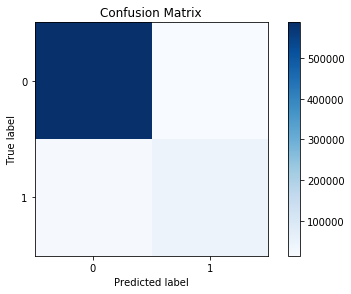

('ROC AUC score in the testing dataset: ', 0.8489638721618012)


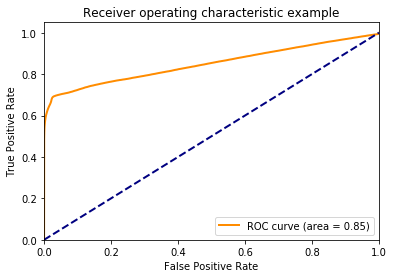

In [75]:
models=[['LogisticRegression',LogisticRegression()],
        ['RandomForest',RandomForestClassifier()],
        ['NaiveBayes',GaussianNB()],
        ['LDA',LinearDiscriminantAnalysis()],
        ['QDA',QuadraticDiscriminantAnalysis()]]

for m in models:
    print ("Testing:", m[0])
    cross_validate_repeated_undersampling_full(X, y, m[1])
    break